In [1]:
import numpy as np
from scipy import *
from pylab import *
import os

%matplotlib inline

In [2]:
folder_Pk = '/global/cscratch1/sd/jialiu/CAMELS/Pk/'
home = '/global/homes/j/jialiu/cosmo_dep_feedback/'

In [38]:
###################################################################
############ organize the files and save to the ideal format
###################################################################
# for ifolder in ['IllustrisTNG',  'IllustrisTNG_DM',  'SIMBA',  'SIMBA_DM']:
#     for iz in [0.00, 1.05, 2.00]:       
#         print (ifolder, iz)
#         Pk_arr = array([np.loadtxt(folder_Pk+'%s/LH_%i/Pk_m_z=%.2f.txt'%(ifolder, i, iz)) for i in range(1000)])
#         save(folder_Pk+'%s_Pk_m_z=%.2f.npy'%(ifolder, iz), Pk_arr[:,:,1])
#         if ifolder=='IllustrisTNG' and iz==0:
#             k=Pk_arr[0,:,0]
#             save(home+'%s_k_m_z=%.2f.npy'%(ifolder, iz), Pk_arr[0,:,0])
#         elif sum(Pk_arr[0,:,0]-k):
#             print (ifolder, iz, 'k different')
#             save(home+'%s_k_m_z=%.2f.npy'%(ifolder, iz), Pk_arr[0,:,0])

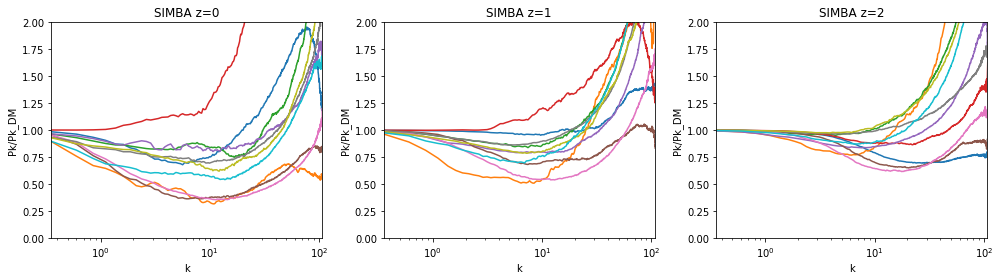

In [57]:
ifolder = 'SIMBA'
# k=np.load(home+'Pk/%s_k_m_z=0.00.npy'%(ifolder))
Pk_0 = np.load(home+'Pk/%s_Pk_m_z=0.00.npy'%(ifolder))
Pk_DM_0 = np.load(home+'Pk/%s_DM_Pk_m_z=0.00.npy'%(ifolder))
Pk_1 = np.load(home+'Pk/%s_Pk_m_z=1.05.npy'%(ifolder))
Pk_DM_1 = np.load(home+'Pk/%s_DM_Pk_m_z=1.05.npy'%(ifolder))
Pk_2 = np.load(home+'Pk/%s_Pk_m_z=2.00.npy'%(ifolder))
Pk_DM_2 = np.load(home+'Pk/%s_DM_Pk_m_z=2.00.npy'%(ifolder))

f, ax=subplots(1,3, figsize=(14,4))
for i in range(10):
    ax[0].plot(k, Pk_0[i]/Pk_DM_0[i])
    ax[1].plot(k, Pk_1[i]/Pk_DM_1[i])
    ax[2].plot(k, Pk_2[i]/Pk_DM_2[i])

for j in range(3):
    ax[j].set_ylim(0, 2)
    ax[j].set_xlim(k[0], k[-20])
    ax[j].set_xscale('log')
    ax[j].set_xlabel('k')
    ax[j].set_ylabel('Pk/Pk_DM')
    ax[j].set_title('%s z=%i'%(ifolder,j))
plt.tight_layout()
show()

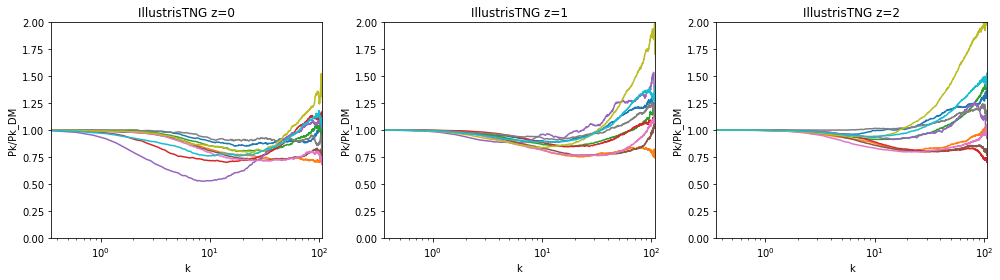

In [59]:
ifolder = 'IllustrisTNG' ## 'SIMBA'
k=np.load(home+'Pk/IllustrisTNG_k_m_z=0.00.npy')
Pk_0 = np.load(home+'Pk/%s_Pk_m_z=0.00.npy'%(ifolder))
Pk_DM_0 = np.load(home+'Pk/%s_DM_Pk_m_z=0.00.npy'%(ifolder))
Pk_1 = np.load(home+'Pk/%s_Pk_m_z=1.05.npy'%(ifolder))
Pk_DM_1 = np.load(home+'Pk/%s_DM_Pk_m_z=1.05.npy'%(ifolder))
Pk_2 = np.load(home+'Pk/%s_Pk_m_z=2.00.npy'%(ifolder))
Pk_DM_2 = np.load(home+'Pk/%s_DM_Pk_m_z=2.00.npy'%(ifolder))

f, ax=subplots(1,3, figsize=(14,4))
for i in range(10):
    ax[0].plot(k, Pk_0[i]/Pk_DM_0[i])
    ax[1].plot(k, Pk_1[i]/Pk_DM_1[i])
    ax[2].plot(k, Pk_2[i]/Pk_DM_2[i])

for j in range(3):
    ax[j].set_ylim(0, 2)
    ax[j].set_xlim(k[0], k[-20])
    ax[j].set_xscale('log')
    ax[j].set_xlabel('k')
    ax[j].set_ylabel('Pk/Pk_DM')
    ax[j].set_title('%s z=%i'%(ifolder,j))
plt.tight_layout()
show()

In [53]:
#### Omega_m sigma_8 A1 A2 A3 A4
lhc_TNG = np.loadtxt(home+'latin_hypercube_params_IllustrisTNG.txt')
lhc_SIMBA = np.loadtxt(home+'latin_hypercube_params_SIMBA.txt')

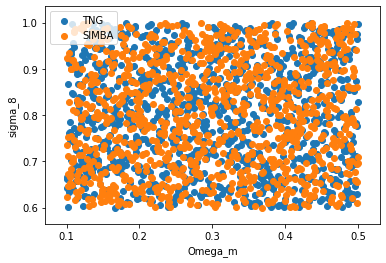

In [54]:
## sort(lhc_TNG.T[0])-sort(lhc_SIMBA.T[0])
### they 2 parameter files are not sorted the same, but seem to have the same parameters
scatter(lhc_TNG.T[0], lhc_TNG.T[1], label='TNG')
scatter(lhc_SIMBA.T[0], lhc_SIMBA.T[1], label='SIMBA')
xlabel('Omega_m'); ylabel('sigma_8')
legend()
show()

In [42]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [45]:
# X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
# y = np.squeeze(X * np.sin(X))
# rng = np.random.RandomState(1)
# training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
# X_train, y_train = X[training_indices], y[training_indices]
# X_train, y_train

In [61]:
# (Pk_0/Pk_DM_0).shape

(1000, 443)

In [48]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [62]:
####### first build a gaussian process
gaussian_process.fit(lhc_TNG, Pk_0/Pk_DM_0)
# gaussian_process.kernel_

/global/homes/j/jialiu/.local/cori/3.7-anaconda-2019.10/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:418: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
/global/homes/j/jialiu/.local/cori/3.7-anaconda-2019.10/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9)

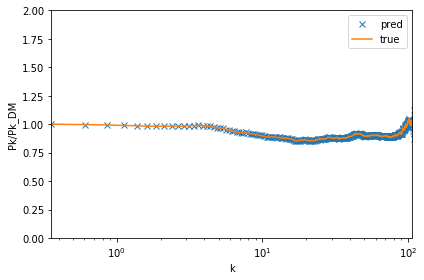

In [80]:
i = 0

test_pred = (gaussian_process.predict( lhc_TNG[i].reshape(-1,1).T)).flatten()
test_true = (Pk_0/Pk_DM_0)[i]

f, ax=subplots(1,1, figsize=(6,4))
ax.plot(k, test_pred, 'x', label='pred')
ax.plot(k, test_true, '-', label='true')

ax.set_ylim(0, 2)
ax.set_xlim(k[0], k[-20])
ax.set_xscale('log')
ax.set_xlabel('k')
ax.set_ylabel('Pk/Pk_DM')
ax.legend()
plt.tight_layout()
show()